# São Paulo city subway - forecast

This model uses the database [São Paulo City - Subway](https://www.kaggle.com/datasets/mexwell/so-paulo-city-subway).

This activity focuses on developing a demand prediction model for subway lines using the Random Forest algorithm. By leveraging its ability to capture complex interactions between multiple variables, the model aims to provide accurate demand forecasts, aiding in resource allocation and operational planning. This approach is compared to traditional statistical models, highlighting the advantages and challenges of using machine learning in this context. The goal is to enhance the smart city platform's capability to anticipate passenger flow and optimize public transport services efficiently.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pel = pd.read_csv('../datasets/sao-paulo-city-subway/pel_complete.csv')
df_pes = pd.read_csv('../datasets/sao-paulo-city-subway/pes_complete.csv')
df_ptl = pd.read_csv('../datasets/sao-paulo-city-subway/ptl_complete.csv')

In [30]:
df_pel.head()

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
0,2017-10-01,1,26029000.0,1059000.0,569000.0,291000.0,1118000.0
1,2017-10-01,2,13219000.0,555000.0,233000.0,142000.0,569000.0
2,2017-10-01,3,30557000.0,1224000.0,684000.0,405000.0,1288000.0
3,2017-10-01,15,260000.0,12000.0,4000.0,1000.0,12000.0
4,2017-11-01,1,24834000.0,1077000.0,571000.0,319000.0,1116000.0


In [31]:
df_pes.head()

,date,line,station,dpea
0,2021-01-01,1,Parada Inglesa,7000.0
1,2021-01-01,1,Jardim São Paulo-Ayrton Senna,6000.0
2,2021-01-01,1,Santana,33000.0
3,2021-01-01,1,Carandiru,6000.0
4,2021-01-01,1,Portuguesa-Tietê,31000.0


In [32]:
df_ptl.head()

,date,line,total,business_day_mean,saturday_mean,sunday_mean,max
0,2017-01-01,4,14678000.0,590000.0,301000.0,166000.0,654000.0
1,2017-01-01,1,29569000.0,1161000.0,704000.0,430000.0,1278000.0
2,2017-01-01,2,13476000.0,554000.0,259000.0,165000.0,617000.0
3,2017-01-01,3,31145000.0,1227000.0,732000.0,451000.0,1343000.0
4,2017-01-01,5,5499000.0,218000.0,136000.0,65000.0,236000.0


In [33]:
print("\nDados faltantes em PEL:")
print(df_pel.isnull().sum())

print("\nDados faltantes em PES:")
print(df_pes.isnull().sum())

print("\nDados faltantes em PTL:")
print(df_ptl.isnull().sum())


Dados faltantes em PEL:
date                 0
line                 0
total                7
business_day_mean    6
saturday_mean        6
sunday_mean          6
max                  6
dtype: int64

Dados faltantes em PES:
date       0
line       0
station    0
dpea       0
dtype: int64

Dados faltantes em PTL:
date                 0
line                 0
total                0
business_day_mean    0
saturday_mean        0
sunday_mean          0
max                  0
dtype: int64


In [34]:
print(df_pel.shape,df_pes.shape,df_ptl.shape)

(390, 7) (2616, 4) (456, 7)


In [35]:
# Total number of records in the dataset
total_records = len(df_pel)

# Counting missing records
missing_total = df_pel['total'].isnull().sum()
missing_business_day_mean = df_pel['business_day_mean'].isnull().sum()
missing_saturday_mean = df_pel['saturday_mean'].isnull().sum()
missing_sunday_mean = df_pel['sunday_mean'].isnull().sum()
missing_max = df_pel['max'].isnull().sum()

# Calculating the proportion of missing data
proportion_total = (missing_total / total_records) * 100
proportion_business_day_mean = (missing_business_day_mean / total_records) * 100
proportion_saturday_mean = (missing_saturday_mean / total_records) * 100
proportion_sunday_mean = (missing_sunday_mean / total_records) * 100
proportion_max = (missing_max / total_records) * 100

# Displaying the proportions
print(f"Proportion of missing data in 'total': {proportion_total:.2f}%")
print(f"Proportion of missing data in 'business_day_mean': {proportion_business_day_mean:.2f}%")
print(f"Proportion of missing data in 'saturday_mean': {proportion_saturday_mean:.2f}%")
print(f"Proportion of missing data in 'sunday_mean': {proportion_sunday_mean:.2f}%")
print(f"Proportion of missing data in 'max': {proportion_max:.2f}%")

Proportion of missing data in 'total': 1.79%
Proportion of missing data in 'business_day_mean': 1.54%
Proportion of missing data in 'saturday_mean': 1.54%
Proportion of missing data in 'sunday_mean': 1.54%
Proportion of missing data in 'max': 1.54%


In [38]:
# Removing rows with missing values in the df_pel DataFrame
df_pel = df_pel.dropna()

# Verifying if there are any missing values left
print(df_pel.isnull().sum())


date                 0
line                 0
total                0
business_day_mean    0
saturday_mean        0
sunday_mean          0
max                  0
dtype: int64


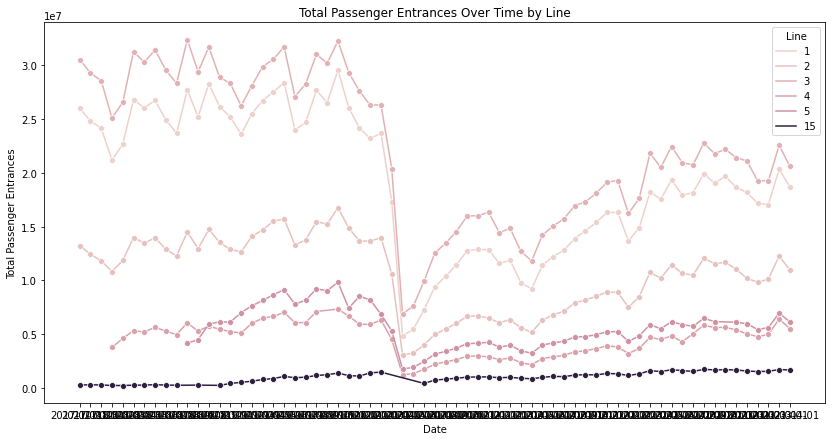

In [41]:
# Visualizing trends in passenger entrance data
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_pel, x='date', y='total', hue='line', marker='o')
plt.title('Total Passenger Entrances Over Time by Line')
plt.xlabel('Date')
plt.ylabel('Total Passenger Entrances')
plt.legend(title='Line')
plt.show()


# TODO